In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import math

Fully charged after 5.467 hours (0-100)


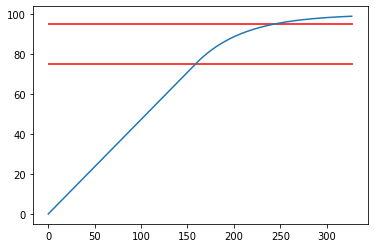

In [24]:
initial_datetime = datetime.strptime('1.7.2022 10:04', '%d.%m.%Y %H:%M')
curr_datetime = datetime.strptime('1.7.2022 14:33', '%d.%m.%Y %H:%M')
initial_soc = 13
target_soc = 99
car_kwh = 17.6 #Smart ForFour
charger_kw = 5

onePercentOfMaxCapacity = car_kwh*0.01
minutesForOnePercent = (onePercentOfMaxCapacity/charger_kw)*60
percentAfterOneMinute = 1/minutesForOnePercent

time_passed = int((curr_datetime - initial_datetime).seconds / 60)

cv_end = 75

y = [0] # SoC
i = 1
while y[-1] < 99 :
    last_soc = y[-1]
    if last_soc >= cv_end:
        curr_soc = last_soc + (percentAfterOneMinute * (1-((last_soc-cv_end)/(100-cv_end))))#0.99**i)
        i += 1

        if curr_soc > 100:
            curr_soc = 100
        y.append(curr_soc)
    else:
        y.append(last_soc + percentAfterOneMinute)

print(f"Fully charged after {round(len(y)/60, 3)} hours (0-100)")

plt.plot(y)
plt.hlines(95, xmin=0, xmax=len(y), color="red")
plt.hlines(cv_end, xmin=0, xmax=len(y), color="red")


In [25]:
socPerMinutes = np.array(y)
mStart = np.where(socPerMinutes > initial_soc)[0][0]
mEnd = np.where(socPerMinutes > target_soc)[0][0]
charging_duration = mEnd - mStart
print(f"Car will be charged from {initial_soc}% to {target_soc}% in {charging_duration / 60} hours")


Car will be charged from 13% to 99% in 4.983333333333333 hours


In [26]:
socEnd = 0
relative_time_passed = time_passed - np.where(socPerMinutes > initial_soc)[0][0]
if relative_time_passed > len(socPerMinutes):
    socEnd = 100
else:
    socEnd = round(socPerMinutes[relative_time_passed],1)

print(f"Car will be charged from {initial_soc}% to {socEnd}% when charged for {round(relative_time_passed/60,2)} hours")

Car will be charged from 13% to 94.8% when charged for 4.02 hours
